## Kelompok<br>
Ajeung Angsaweni - 1301180108 - IF4204<br>
Annisa Miranda - 1301184378 - IF4204

### Importing Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Data Exploration & Data Preparation

### Read Data

In [ ]:
dtrain = pd.read_csv("salju_train.csv")                                         #Reading train dataset
dtest = pd.read_csv("salju_test.csv")                                           #Reading test dataset

In [ ]:
dtrain.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [ ]:
dtest.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


### lihat info data

In [ ]:
dtrain.info()                                                                   #Train dataset null checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [ ]:
dtest.info()                                                                    #Test dataset null checking  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

### Finding Missing Values

In [ ]:
dtrain.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

In [ ]:
dtest.isnull().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

### Duplicate Checking

In [ ]:
dtrain.duplicated().sum()                                                       #Train dataset duplicate checking

0

In [ ]:
dtest.duplicated().sum()                                                        #Test dataset duplicate checking

0

### Handle Missing Values

In [ ]:
dtrain.fillna(dtrain.mean(), inplace=True)                                      #Numeric data in train dataset is filled with mean
dtrain = dtrain.fillna(dtrain.mode().iloc[0])                                   #String data in train dataset is filled with the most frequently occurring value for the attribute
dtrain.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,5.46244,7.599527,WSW,24.000000,N,WSW,0.0,13.0,78.0,76.0,1020.10000,1018.500000,4.450893,4.51614,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.60000,7.400000,W,40.032002,SW,WNW,13.0,20.0,80.0,61.0,1015.20000,1014.600000,7.000000,5.00000,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,5.46244,7.599527,ESE,44.000000,SE,SE,15.0,26.0,62.0,42.0,1017.64708,1015.253117,4.450893,4.51614,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.40000,10.400000,SSW,54.000000,N,SW,13.0,19.0,25.0,17.0,1019.20000,1016.900000,1.000000,7.00000,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.60000,12.600000,N,37.000000,NNW,ESE,22.0,19.0,55.0,48.0,1019.70000,1014.700000,2.000000,6.00000,12.4,18.1,Tidak,Tidak


In [ ]:
dtrain.isnull().sum()                                                           #Train dataset null checking

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [ ]:
dtest.fillna(dtest.mean(), inplace=True)                                        #Numeric data in test dataset is filled with mean
dtest = dtest.fillna(dtest.mode().iloc[0])                                      #String data in test dataset is filled with the most frequently occurring value for the attribute
dtest.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,5.509646,6.400000,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.00000,1012.400000,4.00000,7.000000,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,5.509646,7.630135,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.00000,1015.200000,8.00000,1.000000,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.200000,10.400000,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.60000,1015.700000,0.00000,1.000000,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.600000,6.700000,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.20000,1008.600000,7.00000,6.000000,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,5.509646,7.630135,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,1017.56166,1015.181064,4.44982,4.498322,4.4,6.0,Yes,No


In [ ]:
dtest.isnull().sum()                                                            #Test dataset null checking

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

### Duplicating Dataframe

In [ ]:
data_train = dtrain.copy(deep=True)                                             #Copying train dataset to a new variable
data_test = dtest.copy(deep=True)                                               #Copying test dataset to a new variable

In [ ]:
coltrain = ['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni', 'BersaljuBesok']
dtrain[coltrain] = dtrain[coltrain].apply(LabelEncoder().fit_transform)         #Encoding

In [ ]:
coltest = ['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni', 'BersaljuBesok']
dtest[coltest] = dtest[coltest].apply(LabelEncoder().fit_transform)             #Encoding

### Heatmap

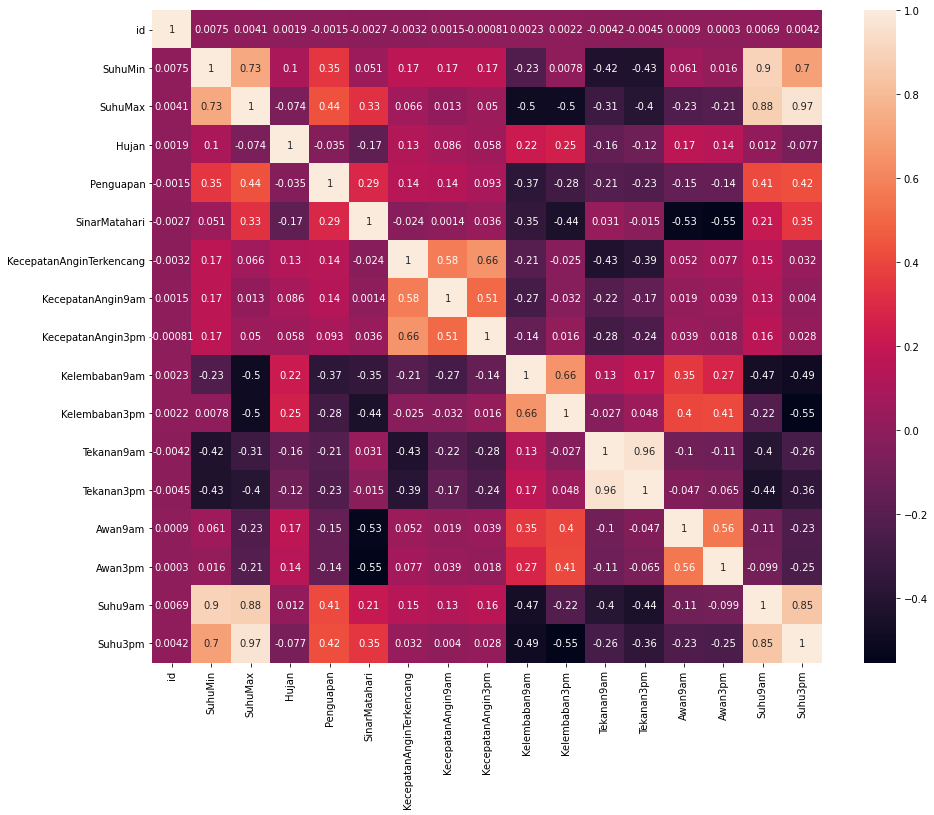

In [ ]:
corr = data_train.corr()                                                        #Displaying the heatmap to see the correlation between attributes in train dataset

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)

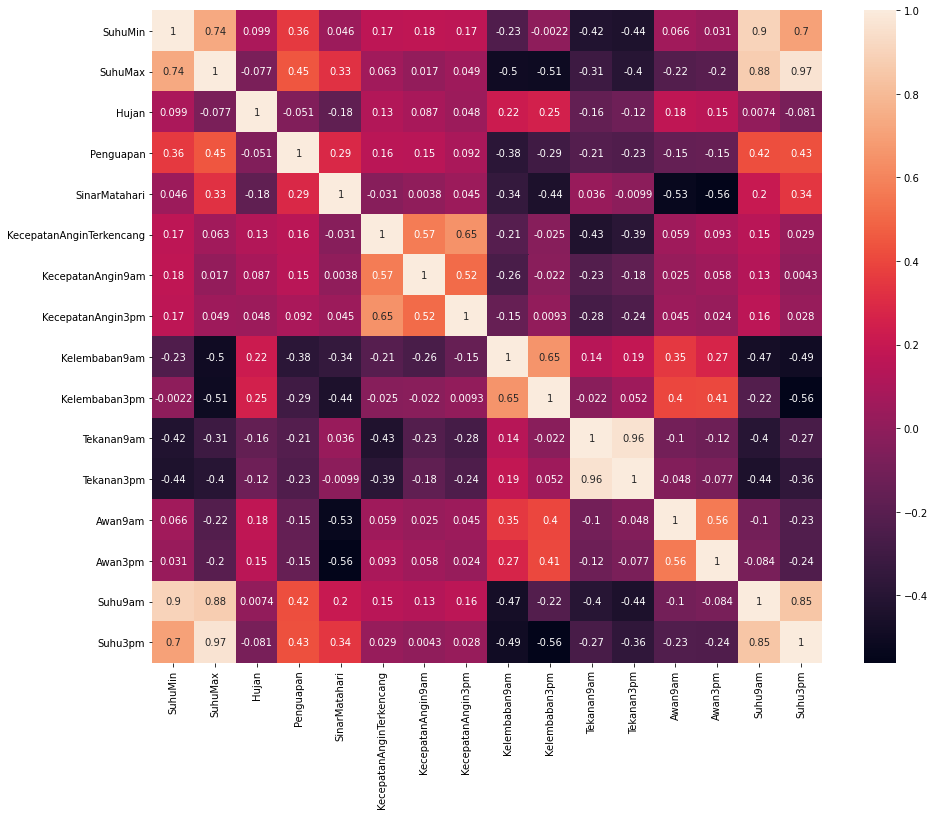

In [ ]:
corr = data_test.corr()                                                         #Displaying the heatmap to see the correlation between attributes in test dataset

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)

### Choose Potential Attributes

In [ ]:
cols = ['Hujan', 'SinarMatahari', 'Penguapan', 'KecepatanAnginTerkencang', 'KecepatanAngin3pm', 'Suhu3pm', 'BersaljuHariIni', 'BersaljuBesok']  #Choosing 'Hujan', 'SinarMatahari', 'Penguapan', 'KecepatanAnginTerkencang', 'KecepatanAngin3pm', 'Suhu3pm', 'BersaljuHariIni', 'BersaljuBesok' as potential attributes
potDataTrain = dtrain.loc[:,cols]                                               #Assigning choosen attributes in train dataset to a new variable
potDataTest = dtest.loc[:,cols]                                                 #Assigning choosen attributes in test dataset to a new variable

In [ ]:
potDataTrain.head()

,Hujan,SinarMatahari,Penguapan,KecepatanAnginTerkencang,KecepatanAngin3pm,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,4.8,7.599527,5.46244,24.000000,13.0,15.0,1,0
1,8.0,7.400000,2.60000,40.032002,20.0,15.5,1,1
2,0.0,7.599527,5.46244,44.000000,26.0,29.6,0,0
3,0.0,10.400000,8.40000,54.000000,19.0,23.2,0,0
4,0.0,12.600000,3.60000,37.000000,19.0,18.1,0,0


In [ ]:
potDataTest.head()

,Hujan,SinarMatahari,Penguapan,KecepatanAnginTerkencang,KecepatanAngin3pm,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.0,6.400000,5.509646,46.0,28.0,23.6,0,0
1,0.2,7.630135,5.509646,56.0,33.0,18.9,0,1
2,0.0,10.400000,5.200000,33.0,19.0,26.3,0,0
3,0.0,6.700000,4.600000,35.0,15.0,26.4,0,0
4,88.0,7.630135,5.509646,46.0,9.0,6.0,1,0


## Label Encoder

In [ ]:
cols2 = ['BersaljuHariIni', 'BersaljuBesok']                                    #Converting string label to numeric
potDataTrain[cols2] = potDataTrain[cols2].apply(LabelEncoder().fit_transform)
potDataTest[cols2] = potDataTest[cols2].apply(LabelEncoder().fit_transform)

## Scalling

In [ ]:
scaler = MinMaxScaler()                                                         #Initialise the Scaler 
potDataTrain.iloc[0:len(dtrain),[0,1,2,3,4,5,6,7]] = scaler.fit_transform(potDataTrain.iloc[0:len(potDataTrain),[0,1,2,3,4,5,6,7]]) #Making numerical data in train dataset have the same range of values
potDataTest.iloc[0:len(dtest),[0,1,2,3,4,5,6,7]] = scaler.fit_transform(potDataTest.iloc[0:len(potDataTest),[0,1,2,3,4,5,6,7]])     #Making numerical data in test dataset have the same range of values

In [ ]:
potDataTrain.head()

,Hujan,SinarMatahari,Penguapan,KecepatanAnginTerkencang,KecepatanAngin3pm,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.012938,0.531435,0.037672,0.132812,0.149425,0.391555,1.0,0.0
1,0.021563,0.517483,0.017931,0.258063,0.229885,0.401152,1.0,1.0
2,0.000000,0.531435,0.037672,0.289062,0.298851,0.671785,0.0,0.0
3,0.000000,0.727273,0.057931,0.367188,0.218391,0.548944,0.0,0.0
4,0.000000,0.881119,0.024828,0.234375,0.218391,0.451056,0.0,0.0


In [ ]:
potDataTest.head()

,Hujan,SinarMatahari,Penguapan,KecepatanAnginTerkencang,KecepatanAngin3pm,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.000000,0.441379,0.080082,0.344828,0.337349,0.548193,0.0,0.0
1,0.000809,0.526216,0.080082,0.431034,0.397590,0.453815,0.0,1.0
2,0.000000,0.717241,0.075581,0.232759,0.228916,0.602410,0.0,0.0
3,0.000000,0.462069,0.066860,0.250000,0.180723,0.604418,0.0,0.0
4,0.355987,0.526216,0.080082,0.344828,0.108434,0.194779,1.0,0.0


## Separating Data Features and Data Label

In [ ]:
x_train = potDataTrain.drop(['BersaljuBesok'],axis=1)                           #Dropped 'BersaljuBesok' column in train dataset
y_train = potDataTrain['BersaljuBesok']                                         #Retrieve data in 'BersaljuBesok' column in train dataset

In [ ]:
x_test = potDataTest.drop(['BersaljuBesok'],axis=1)                             #Dropped 'BersaljuBesok' column in train dataset
y_test = potDataTest['BersaljuBesok']                                           #Retrieve data in 'BersaljuBesok' column in train dataset

## Experiment

In [ ]:
#K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)                                       #Modelling with KNN
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))                  #Evaluation

Accuracy:  0.7857771422285778


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()                                                   #Modelling with Decision Tree
dt.fit(x_train, y_train)

y_predict = dt.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))                  #Evaluation

Accuracy:  0.7053679463205368


In [ ]:
#Random Forest
rf = RandomForestClassifier()                                                   #Modelling with KNN
rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))                  #Evaluation

Accuracy:  0.8007369926300737


The Experiment with the most accurate result is using the Random Forest, with the accuracy result in 0.8007369926300737 or 80,073699%